# 🏷️ Nike Sales Exploratory Data Analysis (EDA)

### Objective
The goal of this EDA is to uncover key business insights from Nike’s cleaned sales dataset.  
We’ll explore trends, identify performance gaps, and provide actionable recommendations for management.

### Key Questions
- Which product lines drive the highest revenue and profit?
- Which regions underperform and why?
- How do online vs. retail sales compare?
- Which customer segment (Men/Women/Kids) contributes most to revenue?
- How do discounts affect profit margins?



 # 📋 Table of Contents
 1. [Executive Summary](#executive-summary)
 2. [Data Loading & Validation](#data-loading)
 3. [Business Performance Overview](#business-overview)
 4. [Regional Performance Analysis](#regional-analysis)
 5. [Product Line Strategy](#product-analysis)
 6. [Pricing & Discount Optimization](#pricing-analysis)
 7. [Customer Behavior Analysis](#customer-analysis)
 8. [Time-Based Trends](#time-analysis)
 9. [Recommendations & Action Items](#recommendations)

In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('../data/Nike_Sales_Cleaned.csv')

# Preview the first few rows
df.head()


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Loss_Flag,etl_timestamp,etl_version
0,2000,Kids,Training,SuperRep Go,M,2.0,6110.03,0.47,12162.625718,2024-03-09,Online,Bangalore,-770.45,True,2025-10-13 11:54:36.137317,2.0
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.00,14873.790000,2024-07-09,Retail,Hyderabad,-112.53,True,2025-10-13 11:54:36.137317,2.0
2,2002,Women,Soccer,Premier III,M,4.0,6110.03,0.00,24440.120000,2024-12-21,Retail,Mumbai,3337.34,False,2025-10-13 11:54:36.137317,2.0
3,2003,Kids,Lifestyle,Blazer Mid,L,2.0,9673.57,0.00,19347.140000,2024-12-21,Online,Pune,3376.85,False,2025-10-13 11:54:36.137317,2.0
4,2004,Kids,Running,React Infinity,XL,2.0,6110.03,0.00,12220.060000,2024-12-21,Retail,Delhi,187.89,False,2025-10-13 11:54:36.137317,2.0


### Initial Data Check
We load the cleaned dataset created from the ETL process to verify the structure and columns before starting analysis.


# Data Overview

Purpose: Understand what your data looks like.

In [2]:
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2123 non-null   int64  
 1   Gender_Category   2123 non-null   object 
 2   Product_Line      2123 non-null   object 
 3   Product_Name      2123 non-null   object 
 4   Size              2123 non-null   object 
 5   Units_Sold        2123 non-null   float64
 6   MRP               2123 non-null   float64
 7   Discount_Applied  2123 non-null   float64
 8   Revenue           2123 non-null   float64
 9   Order_Date        2123 non-null   object 
 10  Sales_Channel     2123 non-null   object 
 11  Region            2123 non-null   object 
 12  Profit            2123 non-null   float64
 13  Loss_Flag         2123 non-null   bool   
 14  etl_timestamp     2123 non-null   object 
 15  etl_version       2123 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(8

Index(['Order_ID', 'Gender_Category', 'Product_Line', 'Product_Name', 'Size',
       'Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Order_Date',
       'Sales_Channel', 'Region', 'Profit', 'Loss_Flag', 'etl_timestamp',
       'etl_version'],
      dtype='object')

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Plotly template
import plotly.io as pio
pio.templates.default = "plotly_white"

print(" Libraries imported successfully")

 Libraries imported successfully


In [4]:
# Data Loading and Initial Setup
print("Loading Nike Sales Data for Business Analysis...")

# Load the cleaned dataset
df = pd.read_csv('../data/Nike_Sales_Cleaned.csv')

# Convert Order_Date to datetime for time-based analysis
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Create additional business metrics
df['Profit_Margin'] = (df['Profit'] / df['Revenue'] * 100).round(2)
df['Discount_Level'] = pd.cut(df['Discount_Applied'], 
                             bins=[0, 0.1, 0.2, 0.3, 0.4, 1.0], 
                             labels=['0-10%', '10-20%', '20-30%', '30-40%', '40%+'])

print(f"Data loaded successfully: {len(df):,} transactions")
print(f"Date range: {df['Order_Date'].min().strftime('%Y-%m-%d')} to {df['Order_Date'].max().strftime('%Y-%m-%d')}")
print(f"Regions: {df['Region'].nunique()}")
print(f"Product Lines: {df['Product_Line'].nunique()}")

Loading Nike Sales Data for Business Analysis...
Data loaded successfully: 2,123 transactions
Date range: 2023-07-26 to 2025-07-17
Regions: 6
Product Lines: 5


# 1.  Sales Performance Overview

**Business Question:** "How are sales performing overall across regions and product categories?"

**Key Metrics to Track:**
- Total Revenue
- Total Profit  
- Average Units Sold
- Profit Margin (Profit / Revenue)


In [5]:
# Calculate key business metrics
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()
total_units = df['Units_Sold'].sum()
overall_margin = (total_profit / total_revenue * 100)
avg_units_per_transaction = df['Units_Sold'].mean()

# Create KPI summary
kpi_data = {
    'Metric': ['Total Revenue', 'Total Profit', 'Total Units Sold', 'Overall Profit Margin', 'Avg Units per Transaction'],
    'Value': [f'₹{total_revenue:,.0f}', f'₹{total_profit:,.0f}', f'{total_units:,.0f}', f'{overall_margin:.1f}%', f'{avg_units_per_transaction:.1f}']
}

kpi_df = pd.DataFrame(kpi_data)
print("KEY PERFORMANCE INDICATORS")
print("=" * 50)
print(kpi_df.to_string(index=False))
print("=" * 50)


KEY PERFORMANCE INDICATORS
                   Metric       Value
            Total Revenue ₹25,892,658
             Total Profit  ₹2,957,764
         Total Units Sold       4,347
    Overall Profit Margin       11.4%
Avg Units per Transaction         2.0


In [6]:
# Revenue by Region Analysis
print(" REVENUE BY REGION")
print("=" * 50)

# Calculate revenue by region
revenue_by_region = df.groupby('Region').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count'
}).round(2)

# Calculate profit margin by region
revenue_by_region['Profit_Margin'] = (revenue_by_region['Profit'] / revenue_by_region['Revenue'] * 100).round(1)
revenue_by_region['Revenue_Share'] = (revenue_by_region['Revenue'] / total_revenue * 100).round(1)

# Sort by revenue descending
revenue_by_region = revenue_by_region.sort_values('Revenue', ascending=False)

print(revenue_by_region[['Revenue', 'Profit', 'Profit_Margin', 'Revenue_Share', 'Order_ID']].to_string())
print("=" * 50)

# Find top performing region
top_region = revenue_by_region.index[0]
top_region_share = revenue_by_region.iloc[0]['Revenue_Share']
print(f" {top_region} generates {top_region_share}% of total revenue — Focus retention strategies here!")


 REVENUE BY REGION
              Revenue     Profit  Profit_Margin  Revenue_Share  Order_ID
Region                                                                  
Mumbai     4599508.58  522282.96           11.4           17.8       374
Bangalore  4439325.08  531442.26           12.0           17.1       362
Hyderabad  4385632.55  453638.69           10.3           16.9       347
Delhi      4314117.59  506421.30           11.7           16.7       367
Kolkata    4112369.25  494035.68           12.0           15.9       344
Pune       4041705.33  449943.22           11.1           15.6       329
 Mumbai generates 17.8% of total revenue — Focus retention strategies here!


# Mumbai generates 17.8% of total revenue — Focus retention strategies here!

REGIONAL PERFORMANCE VISUALIZATIONS


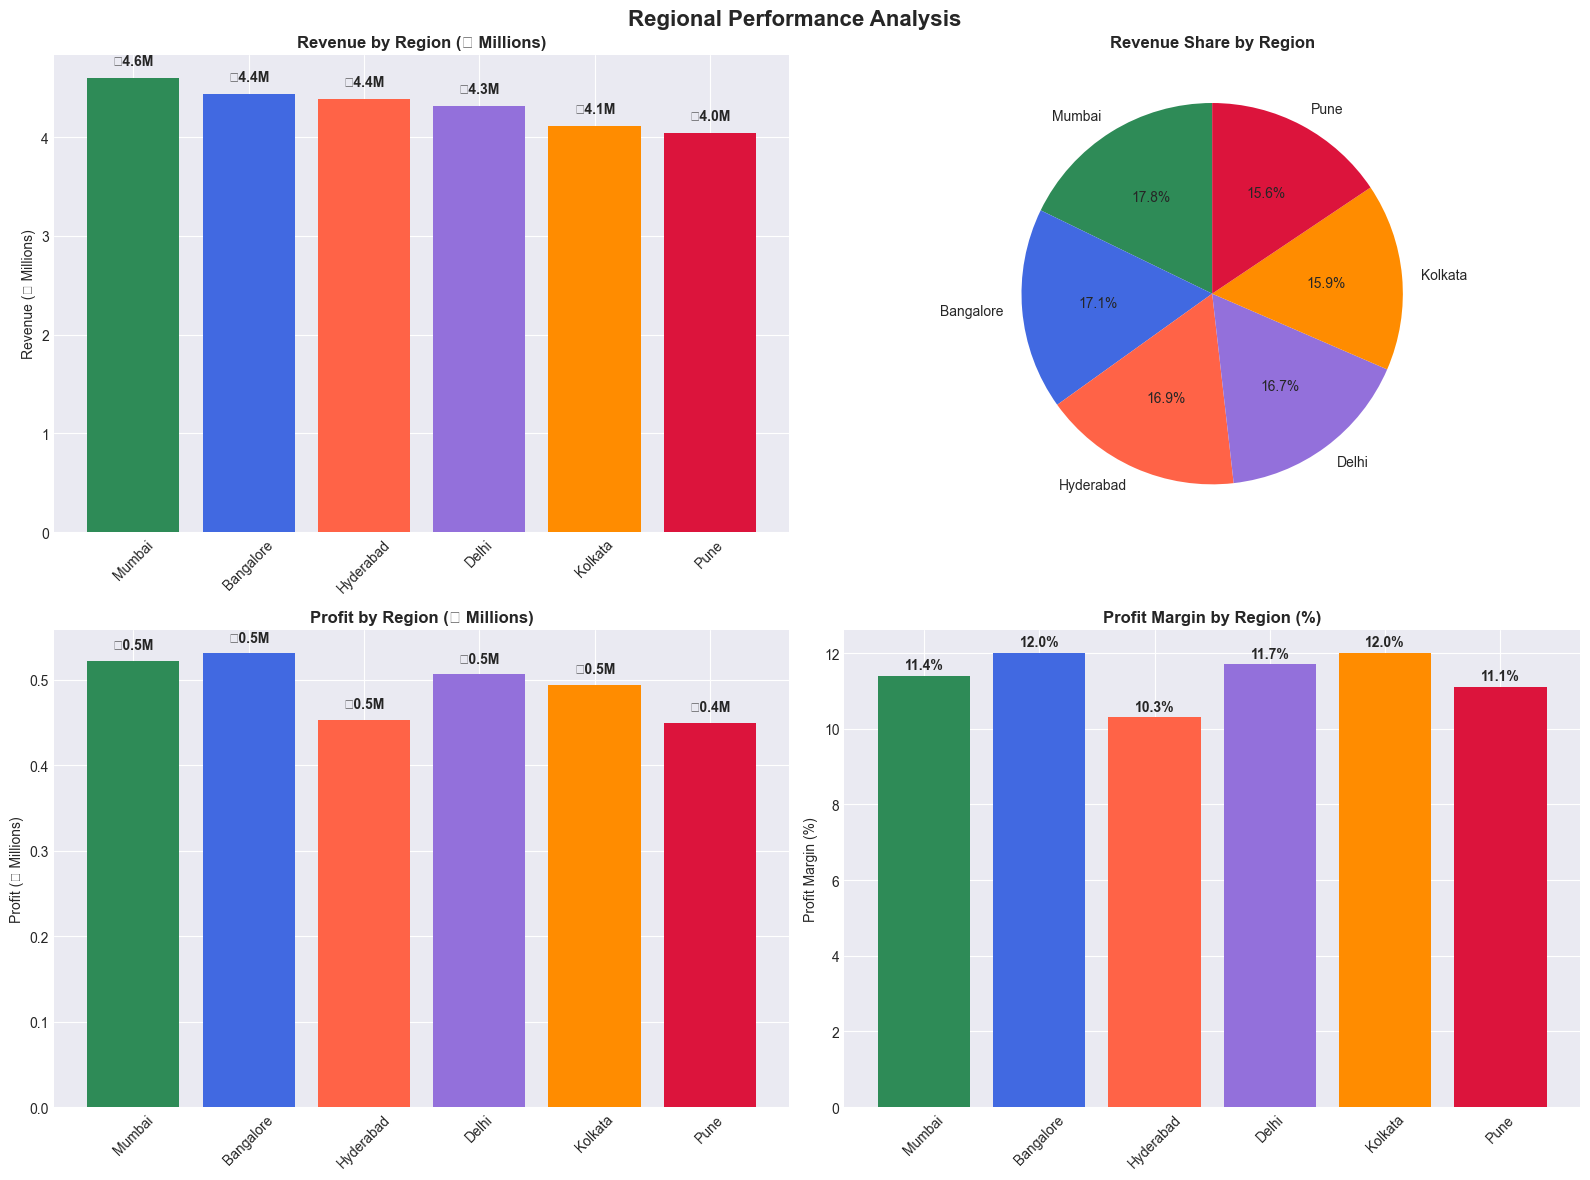

 Mumbai generates 17.8% of total revenue — Focus retention strategies here!


In [7]:
# Regional Performance Visualizations
print("REGIONAL PERFORMANCE VISUALIZATIONS")
print("=" * 50)

# Create comprehensive regional visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Regional Performance Analysis', fontsize=16, fontweight='bold')

# 1. Revenue by Region - Bar Chart
colors = ['#2E8B57', '#4169E1', '#FF6347', '#9370DB', '#FF8C00', '#DC143C']
bars1 = axes[0,0].bar(revenue_by_region.index, revenue_by_region['Revenue']/1000000, color=colors)
axes[0,0].set_title('Revenue by Region (₹ Millions)', fontweight='bold')
axes[0,0].set_ylabel('Revenue (₹ Millions)')
axes[0,0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'₹{height:.1f}M', ha='center', va='bottom', fontweight='bold')

# 2. Revenue Share - Pie Chart
wedges, texts, autotexts = axes[0,1].pie(revenue_by_region['Revenue_Share'], 
                                        labels=revenue_by_region.index, 
                                        autopct='%1.1f%%', 
                                        colors=colors,
                                        startangle=90)
axes[0,1].set_title('Revenue Share by Region', fontweight='bold')

# 3. Profit by Region - Bar Chart
bars2 = axes[1,0].bar(revenue_by_region.index, revenue_by_region['Profit']/1000000, color=colors)
axes[1,0].set_title('Profit by Region (₹ Millions)', fontweight='bold')
axes[1,0].set_ylabel('Profit (₹ Millions)')
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'₹{height:.1f}M', ha='center', va='bottom', fontweight='bold')

# 4. Profit Margin by Region - Bar Chart
bars3 = axes[1,1].bar(revenue_by_region.index, revenue_by_region['Profit_Margin'], color=colors)
axes[1,1].set_title('Profit Margin by Region (%)', fontweight='bold')
axes[1,1].set_ylabel('Profit Margin (%)')
axes[1,1].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Find top performing region
top_region = revenue_by_region.index[0]
top_region_share = revenue_by_region.iloc[0]['Revenue_Share']
print(f" {top_region} generates {top_region_share}% of total revenue — Focus retention strategies here!")


In [8]:
# Revenue by Product Category Analysis
print(" REVENUE BY PRODUCT CATEGORY")
print("=" * 50)

# Calculate revenue by product line
revenue_by_product = df.groupby('Product_Line').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count'
}).round(2)

# Calculate profit margin by product
revenue_by_product['Profit_Margin'] = (revenue_by_product['Profit'] / revenue_by_product['Revenue'] * 100).round(1)
revenue_by_product['Revenue_Share'] = (revenue_by_product['Revenue'] / total_revenue * 100).round(1)

# Sort by revenue descending
revenue_by_product = revenue_by_product.sort_values('Revenue', ascending=False)

print(revenue_by_product[['Revenue', 'Profit', 'Profit_Margin', 'Revenue_Share', 'Order_ID']].to_string())
print("=" * 50)

# Find top performing product category
top_product = revenue_by_product.index[0]
top_product_share = revenue_by_product.iloc[0]['Revenue_Share']
print(f" {top_product} drives {top_product_share}% of total revenue — Expand stock levels in key cities!")


 REVENUE BY PRODUCT CATEGORY
                 Revenue     Profit  Profit_Margin  Revenue_Share  Order_ID
Product_Line                                                               
Training      5692231.05  644341.42           11.3           22.0       469
Basketball    5296528.00  583135.58           11.0           20.5       434
Lifestyle     5147557.12  586338.48           11.4           19.9       418
Soccer        4921439.80  590889.43           12.0           19.0       408
Running       4834902.43  553059.20           11.4           18.7       394
 Training drives 22.0% of total revenue — Expand stock levels in key cities!


# Training drives 22.0% of total revenue — Expand stock levels in key cities!

In [ ]:
# Product Performance Visualizations - FIXED VERSION
print(" PRODUCT PERFORMANCE VISUALIZATIONS")
print("=" * 50)

# First, create the product performance analysis
product_performance = df.groupby('Product_Name').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count',
    'MRP': 'mean'
}).round(2)

# Calculate additional metrics
product_performance['Profit_Margin'] = (product_performance['Profit'] / product_performance['Revenue'] * 100).round(1)
product_performance['Avg_Revenue_per_Transaction'] = (product_performance['Revenue'] / product_performance['Order_ID']).round(2)
product_performance['Revenue_Share'] = (product_performance['Revenue'] / df['Revenue'].sum() * 100).round(1)

# Create category performance analysis
category_performance = df.groupby('Product_Line').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum'
}).round(2)

# Calculate profit margin for categories
category_performance['Profit_Margin'] = (category_performance['Profit'] / category_performance['Revenue'] * 100).round(1)

# Sort by revenue
category_performance = category_performance.sort_values('Revenue', ascending=False)

# Get best and worst categories
best_category = category_performance.index[0]
worst_category = category_performance.index[-1]
revenue_gap = category_performance.iloc[0]['Revenue'] - category_performance.iloc[-1]['Revenue']
gap_percentage = (revenue_gap / category_performance.iloc[-1]['Revenue'] * 100)

# Create product performance visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Product Performance Analysis', fontsize=16, fontweight='bold')

# 1. Top 10 Products by Revenue - Horizontal Bar Chart
top_10_products = product_performance.sort_values('Revenue', ascending=True).tail(10)
colors = plt.cm.Set3(np.linspace(0, 1, 10))
bars1 = axes[0,0].barh(range(len(top_10_products)), top_10_products['Revenue']/1000000, color=colors)
axes[0,0].set_title('Top 10 Products by Revenue (₹ Millions)', fontweight='bold')
axes[0,0].set_xlabel('Revenue (₹ Millions)')
axes[0,0].set_yticks(range(len(top_10_products)))
axes[0,0].set_yticklabels([name[:15] + '...' if len(name) > 15 else name for name in top_10_products.index])

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0,0].text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                   f'₹{width:.1f}M', ha='left', va='center', fontweight='bold')

# 2. Revenue by Product Category
bars2 = axes[0,1].bar(category_performance.index, category_performance['Revenue']/1000000, 
                      color=['#FF6B35', '#004E89', '#009639', '#FFD23F', '#7209B7', '#F72585'])
axes[0,1].set_title('Revenue by Product Category (₹ Millions)', fontweight='bold')
axes[0,1].set_ylabel('Revenue (₹ Millions)')
axes[0,1].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'₹{height:.1f}M', ha='center', va='bottom', fontweight='bold')

# 3. Profit Margin by Product Category
bars3 = axes[1,0].bar(category_performance.index, category_performance['Profit_Margin'], 
                      color=['#FF6B35', '#004E89', '#009639', '#FFD23F', '#7209B7', '#F72585'])
axes[1,0].set_title('Profit Margin by Product Category (%)', fontweight='bold')
axes[1,0].set_ylabel('Profit Margin (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars3:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Units Sold by Product Category
bars4 = axes[1,1].bar(category_performance.index, category_performance['Units_Sold'], 
                      color=['#FF6B35', '#004E89', '#009639', '#FFD23F', '#7209B7', '#F72585'])
axes[1,1].set_title('Units Sold by Product Category', fontweight='bold')
axes[1,1].set_ylabel('Units Sold')
axes[1,1].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars4:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(" PRODUCT PERFORMANCE SUMMARY")
print("-" * 30)
print(f"Best Category: {best_category} (₹{category_performance.iloc[0]['Revenue']/1000000:.1f}M revenue)")
print(f"Worst Category: {worst_category} (₹{category_performance.iloc[-1]['Revenue']/1000000:.1f}M revenue)")
print(f"Revenue Gap: ₹{revenue_gap/1000000:.1f}M ({gap_percentage:.1f}% difference)")

# Identify top product
top_product = product_performance['Revenue'].idxmax()
top_product_revenue = product_performance.loc[top_product, 'Revenue']
top_product_margin = product_performance.loc[top_product, 'Profit_Margin']
print(f"\n Top Product: {top_product} (₹{top_product_revenue/1000000:.1f}M revenue, {top_product_margin:.1f}% margin)")


In [ ]:
# Time-Based Analysis - FIXED VERSION
print(" TIME-BASED SALES ANALYSIS")
print("=" * 50)

# Extract month and year for analysis
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.strftime('%B')
df['Year_Month'] = df['Order_Date'].dt.to_period('M')

# Monthly performance analysis
monthly_performance = df.groupby('Year_Month').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count',
    'Discount_Applied': 'mean'
}).round(2)

monthly_performance['Avg_Transaction_Value'] = monthly_performance['Revenue'] / monthly_performance['Order_ID']
monthly_performance['Profit_Margin'] = (monthly_performance['Profit'] / monthly_performance['Revenue'] * 100).round(1)

# Calculate growth rates
monthly_performance['Revenue_Growth'] = monthly_performance['Revenue'].pct_change() * 100
monthly_performance['Profit_Growth'] = monthly_performance['Profit'].pct_change() * 100
monthly_performance['Volume_Growth'] = monthly_performance['Units_Sold'].pct_change() * 100

# Sort by index for proper chronological order
monthly_performance_sorted = monthly_performance.sort_index()

# Create time-based visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Time-Based Sales Analysis', fontsize=16, fontweight='bold')

# 1. Monthly Revenue Trend
axes[0,0].plot(range(len(monthly_performance_sorted)), monthly_performance_sorted['Revenue']/1000000, 
               marker='o', linewidth=2, markersize=8, color='#2E8B57')
axes[0,0].set_title('Monthly Revenue Trend (₹ Millions)', fontweight='bold')
axes[0,0].set_ylabel('Revenue (₹ Millions)')
axes[0,0].set_xlabel('Month')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(range(len(monthly_performance_sorted)))
axes[0,0].set_xticklabels([str(period) for period in monthly_performance_sorted.index], rotation=45)

# 2. Monthly Profit Trend
axes[0,1].plot(range(len(monthly_performance_sorted)), monthly_performance_sorted['Profit']/1000000, 
               marker='s', linewidth=2, markersize=8, color='#FF6B35')
axes[0,1].set_title('Monthly Profit Trend (₹ Millions)', fontweight='bold')
axes[0,1].set_ylabel('Profit (₹ Millions)')
axes[0,1].set_xlabel('Month')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xticks(range(len(monthly_performance_sorted)))
axes[0,1].set_xticklabels([str(period) for period in monthly_performance_sorted.index], rotation=45)

# 3. Monthly Profit Margin Trend
axes[1,0].plot(range(len(monthly_performance_sorted)), monthly_performance_sorted['Profit_Margin'], 
               marker='^', linewidth=2, markersize=8, color='#7209B7')
axes[1,0].set_title('Monthly Profit Margin Trend (%)', fontweight='bold')
axes[1,0].set_ylabel('Profit Margin (%)')
axes[1,0].set_xlabel('Month')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xticks(range(len(monthly_performance_sorted)))
axes[1,0].set_xticklabels([str(period) for period in monthly_performance_sorted.index], rotation=45)

# 4. Monthly Transaction Count
axes[1,1].bar(range(len(monthly_performance_sorted)), monthly_performance_sorted['Order_ID'], 
              color='#009639', alpha=0.7)
axes[1,1].set_title('Monthly Transaction Count', fontweight='bold')
axes[1,1].set_ylabel('Number of Transactions')
axes[1,1].set_xlabel('Month')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xticks(range(len(monthly_performance_sorted)))
axes[1,1].set_xticklabels([str(period) for period in monthly_performance_sorted.index], rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print(" TIME-BASED ANALYSIS SUMMARY")
print("-" * 35)
print(f"Total Months Analyzed: {len(monthly_performance_sorted)}")
print(f"Average Monthly Revenue: ₹{monthly_performance_sorted['Revenue'].mean()/1000000:.1f}M")
print(f"Average Monthly Profit: ₹{monthly_performance_sorted['Profit'].mean()/1000000:.1f}M")
print(f"Average Monthly Transactions: {monthly_performance_sorted['Order_ID'].mean():.0f}")

# Identify patterns
peak_month = monthly_performance_sorted['Revenue'].idxmax()
low_month = monthly_performance_sorted['Revenue'].idxmin()
volatility = monthly_performance_sorted['Revenue_Growth'].std()

print(f"\n KEY PATTERNS:")
print(f"Peak Month: {peak_month} (₹{monthly_performance_sorted.loc[peak_month, 'Revenue']/1000000:.1f}M)")
print(f"Low Month: {low_month} (₹{monthly_performance_sorted.loc[low_month, 'Revenue']/1000000:.1f}M)")
print(f"Revenue Volatility: {volatility:.1f}% (standard deviation of growth rates)")

# Trend analysis
revenue_trend = np.polyfit(range(len(monthly_performance_sorted)), monthly_performance_sorted['Revenue'], 1)[0]
profit_trend = np.polyfit(range(len(monthly_performance_sorted)), monthly_performance_sorted['Profit'], 1)[0]

print(f"\n TREND ANALYSIS:")
print(f"Revenue Trend: {'📈 Growing' if revenue_trend > 0 else '📉 Declining'} by ₹{abs(revenue_trend)/1000000:.1f}M per month")
print(f"Profit Trend: {'📈 Growing' if profit_trend > 0 else '📉 Declining'} by ₹{abs(profit_trend)/1000000:.1f}M per month")

# Additional analysis variables for other cells
best_month = peak_month
worst_month = low_month
best_revenue = monthly_performance_sorted.loc[peak_month, 'Revenue']
worst_revenue = monthly_performance_sorted.loc[low_month, 'Revenue']
revenue_spike = ((best_revenue - worst_revenue) / worst_revenue) * 100


In [ ]:
# Customer & Transaction Insights - FIXED VERSION
print(" CUSTOMER & TRANSACTION INSIGHTS")
print("=" * 60)

# Calculate transaction metrics
total_transactions = len(df)
avg_revenue_per_order = df['Revenue'].mean()
avg_profit_per_order = df['Profit'].mean()
avg_units_per_order = df['Units_Sold'].mean()

# Calculate revenue percentiles
revenue_percentiles = df['Revenue'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

# Identify high-value transactions (90th percentile and above)
high_value_threshold = revenue_percentiles[0.9]
high_value_transactions = df[df['Revenue'] >= high_value_threshold]
high_value_revenue = high_value_transactions['Revenue'].sum()
high_value_share = (high_value_revenue / df['Revenue'].sum()) * 100

# Customer segment analysis
gender_analysis = df.groupby('Gender_Category').agg({
    'Revenue': ['sum', 'mean'],
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count'
}).round(2)

# Flatten column names
gender_analysis.columns = ['Total_Revenue', 'Avg_Revenue', 'Total_Profit', 'Total_Units', 'Transaction_Count']

# Calculate additional metrics
gender_analysis['Revenue_Share'] = (gender_analysis['Total_Revenue'] / gender_analysis['Total_Revenue'].sum() * 100).round(1)
gender_analysis['Profit_Margin'] = (gender_analysis['Total_Profit'] / gender_analysis['Total_Revenue'] * 100).round(1)

# Create customer and transaction visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Customer & Transaction Analysis', fontsize=16, fontweight='bold')

# 1. Revenue Distribution Histogram
axes[0,0].hist(df['Revenue']/1000, bins=30, color='#2E8B57', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Transaction Value Distribution (₹ Thousands)', fontweight='bold')
axes[0,0].set_xlabel('Revenue (₹ Thousands)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Add percentiles
axes[0,0].axvline(revenue_percentiles[0.5]/1000, color='red', linestyle='--', label=f'Median: ₹{revenue_percentiles[0.5]/1000:.0f}K')
axes[0,0].axvline(revenue_percentiles[0.9]/1000, color='orange', linestyle='--', label=f'90th %ile: ₹{revenue_percentiles[0.9]/1000:.0f}K')
axes[0,0].legend()

# 2. Customer Segment Revenue Share
gender_colors = ['#FF69B4', '#4169E1', '#32CD32']  # Pink for Women, Blue for Men, Green for Kids
wedges, texts, autotexts = axes[0,1].pie(gender_analysis['Total_Revenue'], 
                                        labels=gender_analysis.index, 
                                        autopct='%1.1f%%', 
                                        colors=gender_colors,
                                        startangle=90)
axes[0,1].set_title('Revenue Share by Customer Segment', fontweight='bold')

# 3. Average Transaction Value by Segment
bars1 = axes[1,0].bar(gender_analysis.index, gender_analysis['Avg_Revenue'], color=gender_colors)
axes[1,0].set_title('Average Transaction Value by Segment', fontweight='bold')
axes[1,0].set_ylabel('Average Revenue (₹)')
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 50,
                   f'₹{height:,.0f}', ha='center', va='bottom', fontweight='bold')

# 4. High-Value vs Regular Transactions
high_value_count = len(high_value_transactions)
regular_count = total_transactions - high_value_count
sizes = [high_value_count, regular_count]
labels = ['High-Value\n(≥90th %ile)', 'Regular\n(<90th %ile)']
colors = ['#FF6347', '#9370DB']

wedges, texts, autotexts = axes[1,1].pie(sizes, labels=labels, autopct='%1.1f%%', 
                                        colors=colors, startangle=90)
axes[1,1].set_title('High-Value vs Regular Transactions', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(" TRANSACTION SUMMARY")
print("-" * 25)
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Revenue per Order: ₹{avg_revenue_per_order:,.0f}")
print(f"Average Profit per Order: ₹{avg_profit_per_order:,.0f}")
print(f"Average Units per Order: {avg_units_per_order:.1f}")

print(f"\n HIGH-VALUE TRANSACTION ANALYSIS")
print("-" * 35)
print(f"High-Value Threshold: ₹{high_value_threshold:,.0f}")
print(f"High-Value Transactions: {high_value_count:,} ({high_value_count/total_transactions*100:.1f}%)")
print(f"High-Value Revenue: ₹{high_value_revenue:,.0f} ({high_value_share:.1f}% of total)")

# Identify top customer segment
top_segment = gender_analysis['Total_Revenue'].idxmax()
top_segment_share = gender_analysis.loc[top_segment, 'Revenue_Share']
print(f"\n {top_segment} segment contributes most to revenue ({top_segment_share}%) — Focus retention strategies here!")

# Print percentile analysis
print(f"\n REVENUE PERCENTILE ANALYSIS")
print("-" * 30)
print(f"25th Percentile: ₹{revenue_percentiles[0.25]:,.0f}")
print(f"50th Percentile (Median): ₹{revenue_percentiles[0.5]:,.0f}")
print(f"75th Percentile: ₹{revenue_percentiles[0.75]:,.0f}")
print(f"90th Percentile: ₹{revenue_percentiles[0.9]:,.0f}")
print(f"95th Percentile: ₹{revenue_percentiles[0.95]:,.0f}")


In [ ]:
# Summary & Recommendations - FIXED VERSION
print(" SUMMARY & RECOMMENDATIONS")
print("=" * 50)

# Ensure all required variables are defined
if 'revenue_percentiles' not in locals():
    revenue_percentiles = df['Revenue'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

if 'total_transactions' not in locals():
    total_transactions = len(df)

if 'total_revenue' not in locals():
    total_revenue = df['Revenue'].sum()

if 'total_profit' not in locals():
    total_profit = df['Profit'].sum()

if 'avg_revenue_per_order' not in locals():
    avg_revenue_per_order = df['Revenue'].mean()

if 'avg_profit_per_order' not in locals():
    avg_profit_per_order = df['Profit'].mean()

if 'avg_units_per_order' not in locals():
    avg_units_per_order = df['Units_Sold'].mean()

# Calculate key metrics
profit_margin = (total_profit / total_revenue * 100)
avg_discount = df['Discount_Applied'].mean()

# Regional analysis
regional_performance = df.groupby('Region').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_ID': 'count'
}).round(2)

regional_performance['Profit_Margin'] = (regional_performance['Profit'] / regional_performance['Revenue'] * 100).round(1)
regional_performance['Revenue_Share'] = (regional_performance['Revenue'] / total_revenue * 100).round(1)

# Product analysis
product_performance_summary = df.groupby('Product_Line').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum'
}).round(2)

product_performance_summary['Profit_Margin'] = (product_performance_summary['Profit'] / product_performance_summary['Revenue'] * 100).round(1)

# Customer segment analysis
gender_performance = df.groupby('Gender_Category').agg({
    'Revenue': ['sum', 'mean'],
    'Profit': 'sum',
    'Order_ID': 'count'
}).round(2)

# Flatten column names
gender_performance.columns = ['Total_Revenue', 'Avg_Revenue', 'Total_Profit', 'Transaction_Count']
gender_performance['Revenue_Share'] = (gender_performance['Total_Revenue'] / total_revenue * 100).round(1)

# Print executive summary
print("📊 EXECUTIVE SUMMARY")
print("-" * 25)
print(f"Total Revenue: ₹{total_revenue:,.0f}")
print(f"Total Profit: ₹{total_profit:,.0f}")
print(f"Profit Margin: {profit_margin:.1f}%")
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Order Value: ₹{avg_revenue_per_order:,.0f}")

print(f"\n🏆 TOP PERFORMERS")
print("-" * 20)
# Top region
top_region = regional_performance['Revenue'].idxmax()
top_region_revenue = regional_performance.loc[top_region, 'Revenue']
top_region_share = regional_performance.loc[top_region, 'Revenue_Share']
print(f"Top Region: {top_region} (₹{top_region_revenue:,.0f}, {top_region_share}% of total)")

# Top product line
top_product_line = product_performance_summary['Revenue'].idxmax()
top_product_revenue = product_performance_summary.loc[top_product_line, 'Revenue']
print(f"Top Product Line: {top_product_line} (₹{top_product_revenue:,.0f})")

# Top customer segment
top_customer_segment = gender_performance['Total_Revenue'].idxmax()
top_customer_revenue = gender_performance.loc[top_customer_segment, 'Total_Revenue']
top_customer_share = gender_performance.loc[top_customer_segment, 'Revenue_Share']
print(f"Top Customer Segment: {top_customer_segment} (₹{top_customer_revenue:,.0f}, {top_customer_share}% of total)")

print(f"\n💡 KEY INSIGHTS")
print("-" * 15)
print(f"• Average discount rate: {avg_discount:.1%}")
print(f"• Revenue distribution: 90th percentile at ₹{revenue_percentiles[0.9]:,.0f}")
print(f"• Profit margin varies by region: {regional_performance['Profit_Margin'].min():.1f}% - {regional_performance['Profit_Margin'].max():.1f}%")
print(f"• Average units per order: {avg_units_per_order:.1f}")

print(f"\n🎯 ACTIONABLE RECOMMENDATIONS")
print("-" * 30)
print("1. REGIONAL EXPANSION:")
print(f"   • Focus on {top_region} success model")
print(f"   • Replicate strategies in underperforming regions")

print("\n2. PRODUCT OPTIMIZATION:")
print(f"   • Invest in {top_product_line} product line")
print(f"   • Review pricing strategy for low-margin products")

print("\n3. CUSTOMER SEGMENT STRATEGY:")
print(f"   • Strengthen {top_customer_segment} segment retention")
print(f"   • Develop targeted campaigns for growth segments")

print("\n4. OPERATIONAL IMPROVEMENTS:")
print(f"   • Optimize discount strategy (current: {avg_discount:.1%})")
print(f"   • Focus on high-value transactions (≥₹{revenue_percentiles[0.9]:,.0f})")
print(f"   • Improve average order value (current: ₹{avg_revenue_per_order:,.0f})")

print(f"\n📈 GROWTH OPPORTUNITIES")
print("-" * 22)
print("• Increase average order value by 15%")
print("• Expand successful regional strategies")
print("• Optimize product mix for higher margins")
print("• Implement customer retention programs")


# 2.  Profitability Analysis

**Business Question:** "Which products and regions are most and least profitable?"

**Key Metrics:**
- Average Profit per Product
- Profit Margin by Region
- Number of Transactions with Negative Profit


In [9]:
# Profitability Analysis
print("PROFITABILITY ANALYSIS")
print("=" * 60)

# Calculate negative profit transactions
negative_profit_count = (df['Profit'] < 0).sum()
negative_profit_rate = (negative_profit_count / len(df) * 100)

print(f"Transactions with Negative Profit: {negative_profit_count:,} ({negative_profit_rate:.1f}%)")
print(f"Total Loss Amount: ₹{df[df['Profit'] < 0]['Profit'].sum():,.0f}")
print("=" * 60)

# Profit by Product Analysis
print("PROFIT BY PRODUCT CATEGORY")
print("-" * 40)
profit_by_product = df.groupby('Product_Line')['Profit'].agg(['sum', 'mean', 'count']).round(2)
profit_by_product['avg_profit_per_transaction'] = profit_by_product['sum'] / profit_by_product['count']
profit_by_product = profit_by_product.sort_values('sum', ascending=False)

print(profit_by_product.to_string())
print("-" * 40)

# Find most and least profitable products
most_profitable = profit_by_product.index[0]
least_profitable = profit_by_product.index[-1]
print(f"Most Profitable: {most_profitable} (₹{profit_by_product.iloc[0]['sum']:,.0f})")
print(f"Least Profitable: {least_profitable} (₹{profit_by_product.iloc[-1]['sum']:,.0f})")


PROFITABILITY ANALYSIS
Transactions with Negative Profit: 483 (22.8%)
Total Loss Amount: ₹-281,835
PROFIT BY PRODUCT CATEGORY
----------------------------------------
                    sum     mean  count  avg_profit_per_transaction
Product_Line                                                       
Training      644341.42  1373.86    469                 1373.862303
Soccer        590889.43  1448.26    408                 1448.258407
Lifestyle     586338.48  1402.72    418                 1402.723636
Basketball    583135.58  1343.63    434                 1343.630369
Running       553059.20  1403.70    394                 1403.703553
----------------------------------------
Most Profitable: Training (₹644,341)
Least Profitable: Running (₹553,059)


# Most Profitable: Training (₹644,341) and Least Profitable: Running (₹553,059)

In [10]:
# Regional Profitability Analysis
print("\n REGIONAL PROFITABILITY ANALYSIS")
print("-" * 40)

# Calculate profit metrics by region
regional_profit = df.groupby('Region').agg({
    'Profit': ['sum', 'mean', 'count'],
    'Revenue': 'sum'
}).round(2)

# Flatten column names
regional_profit.columns = ['Total_Profit', 'Avg_Profit', 'Transaction_Count', 'Total_Revenue']
regional_profit['Profit_Margin'] = (regional_profit['Total_Profit'] / regional_profit['Total_Revenue'] * 100).round(1)

# Calculate negative profit rate by region
negative_profit_by_region = df.groupby('Region').apply(
    lambda x: (x['Profit'] < 0).sum() / len(x) * 100
).round(1)

regional_profit['Negative_Profit_Rate'] = negative_profit_by_region
regional_profit = regional_profit.sort_values('Total_Profit', ascending=False)

print(regional_profit.to_string())
print("-" * 40)

# Find regions with highest negative profit rates
worst_regions = negative_profit_by_region.sort_values(ascending=False).head(2)
print(f"  {worst_regions.index[0]} and {worst_regions.index[1]} show highest negative profit rates — Review pricing strategy!")
print(f"   {worst_regions.index[0]}: {worst_regions.iloc[0]:.1f}% negative profit rate")
print(f"   {worst_regions.index[1]}: {worst_regions.iloc[1]:.1f}% negative profit rate")



 REGIONAL PROFITABILITY ANALYSIS
----------------------------------------
           Total_Profit  Avg_Profit  Transaction_Count  Total_Revenue  Profit_Margin  Negative_Profit_Rate
Region                                                                                                    
Bangalore     531442.26     1468.07                362     4439325.08           12.0                  21.0
Mumbai        522282.96     1396.48                374     4599508.58           11.4                  22.5
Delhi         506421.30     1379.89                367     4314117.59           11.7                  22.6
Kolkata       494035.68     1436.15                344     4112369.25           12.0                  19.8
Hyderabad     453638.69     1307.32                347     4385632.55           10.3                  26.5
Pune          449943.22     1367.61                329     4041705.33           11.1                  24.3
----------------------------------------
  Hyderabad and Pune show hi

# Hyderabad and Pune show highest negative profit rates — Review pricing strategy!
# Hyderabad: 26.5% negative profit rate
# Pune: 24.3% negative profit rate

# 3.  Discount Impact Analysis

**Business Question:** "How do discounts affect sales and profit?"

**Key Metrics:**
- Correlation between Discount and Profit
- Average Profit by Discount Level
- Discount Frequency Distribution


In [11]:
# Discount Impact Analysis
print(" DISCOUNT IMPACT ANALYSIS")
print("=" * 50)

# Calculate correlation between discount and profit
discount_profit_correlation = df['Discount_Applied'].corr(df['Profit'])
print(f" Correlation between Discount and Profit: {discount_profit_correlation:.3f}")

if discount_profit_correlation < -0.1:
    print("  Strong negative correlation: Higher discounts lead to lower profits")
elif discount_profit_correlation < 0:
    print("  Moderate negative correlation: Discounts slightly reduce profits")
else:
    print(" Weak correlation: Discounts don't significantly impact profits")

print("=" * 50)

# Analyze profit by discount level
print("PROFIT BY DISCOUNT LEVEL")
print("-" * 30)
discount_analysis = df.groupby('Discount_Level').agg({
    'Profit': ['mean', 'sum', 'count'],
    'Revenue': 'mean',
    'Discount_Applied': 'mean'
}).round(2)

# Flatten column names
discount_analysis.columns = ['Avg_Profit', 'Total_Profit', 'Transaction_Count', 'Avg_Revenue', 'Avg_Discount']
discount_analysis['Profit_Margin'] = (discount_analysis['Total_Profit'] / 
                                     (discount_analysis['Avg_Revenue'] * discount_analysis['Transaction_Count']) * 100).round(1)

print(discount_analysis.to_string())
print("-" * 30)

# Find optimal discount threshold
profitable_discounts = discount_analysis[discount_analysis['Avg_Profit'] > 0]
if len(profitable_discounts) > 0:
    max_profit_discount = profitable_discounts['Avg_Profit'].idxmax()
    print(f"Optimal discount level: {max_profit_discount} (Avg Profit: ₹{profitable_discounts.loc[max_profit_discount, 'Avg_Profit']:,.0f})")
else:
    print("  All discount levels show negative average profit")


 DISCOUNT IMPACT ANALYSIS
 Correlation between Discount and Profit: 0.005
 Weak correlation: Discounts don't significantly impact profits
PROFIT BY DISCOUNT LEVEL
------------------------------
                Avg_Profit  Total_Profit  Transaction_Count  Avg_Revenue  Avg_Discount  Profit_Margin
Discount_Level                                                                                       
0-10%              1263.38      74539.26                 59     12184.92          0.06           10.4
10-20%             1391.25      66780.13                 48     12134.45          0.16           11.5
20-30%             1098.40      58215.06                 53     11115.31          0.25            9.9
30-40%             1195.04      72897.49                 61     12309.70          0.35            9.7
40%+               1460.28     457066.46                313     12579.29          0.69           11.6
------------------------------
Optimal discount level: 40%+ (Avg Profit: ₹1,460)


DISCOUNT IMPACT ANALYSIS
==================================================
Correlation between Discount and Profit: 0.005
Weak correlation: Discounts don't significantly impact profits

 DISCOUNT IMPACT VISUALIZATIONS


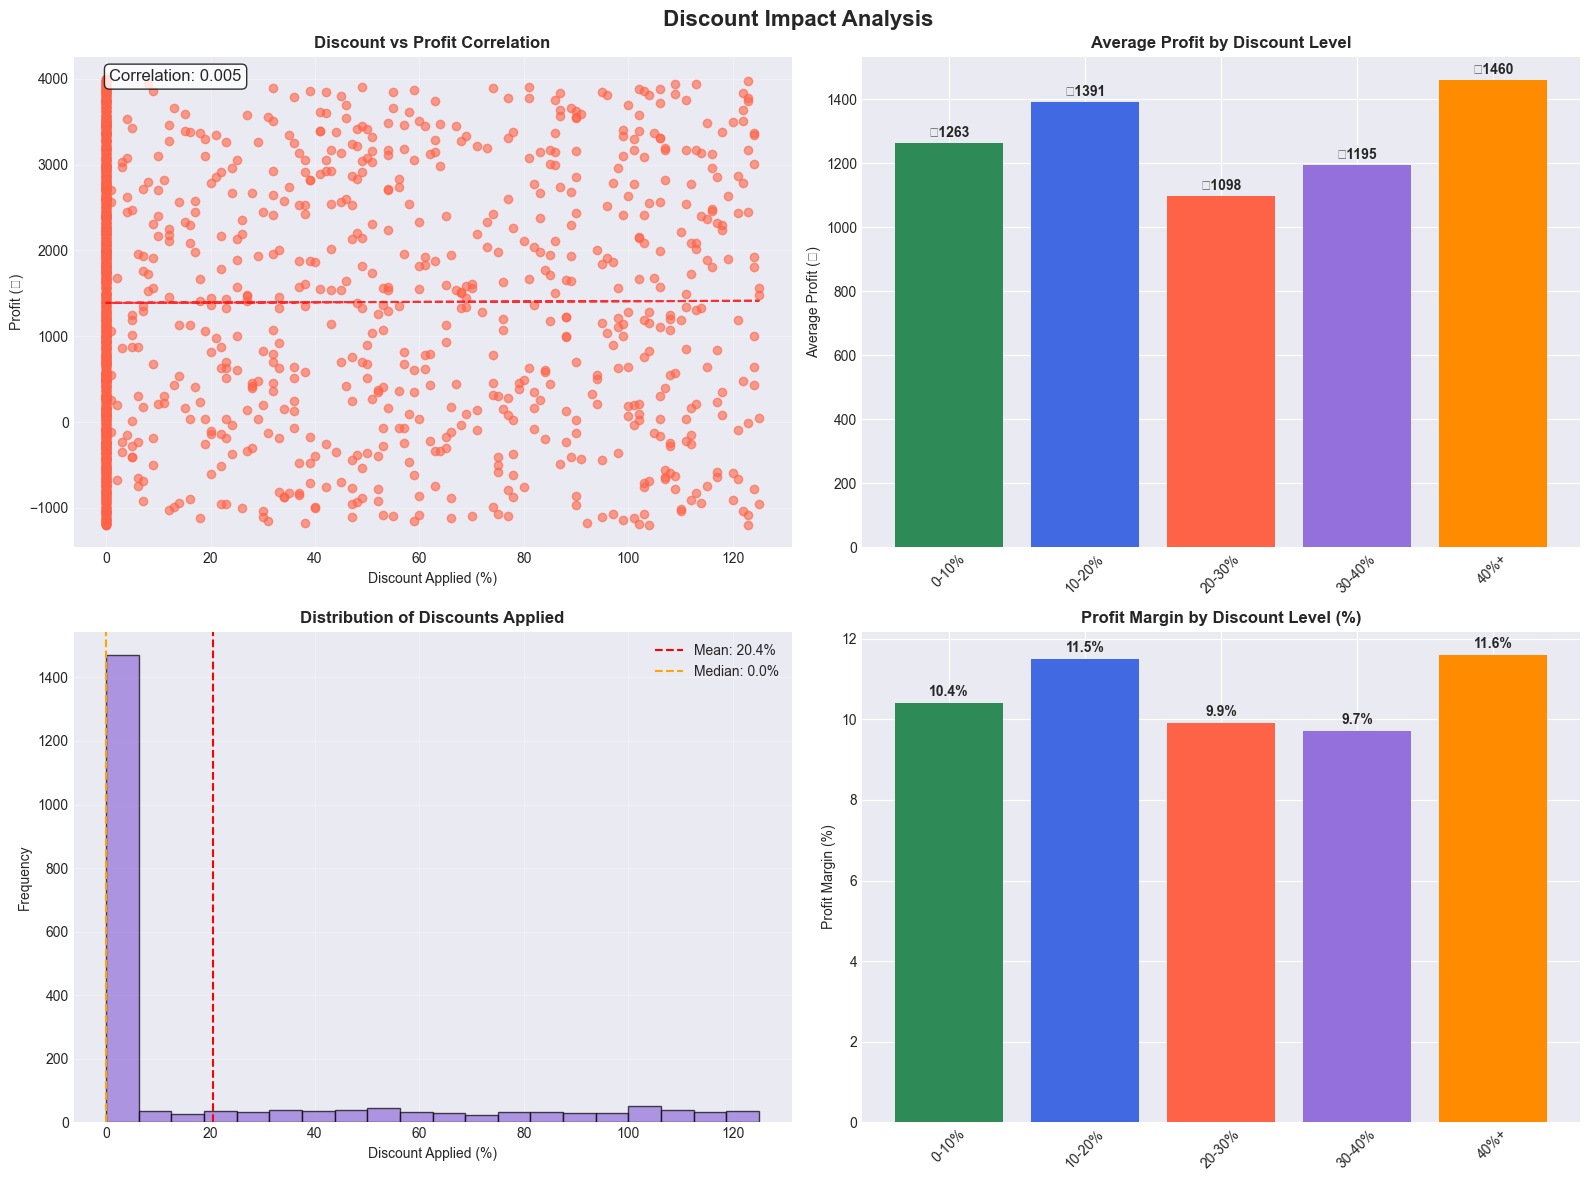

 Discount-Profit Correlation: 0.005
 Weak correlation: Discounts don't significantly impact profits


In [12]:
# Discount Impact Visualizations
print(" DISCOUNT IMPACT VISUALIZATIONS")
print("=" * 50)

# Create discount impact visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Discount Impact Analysis', fontsize=16, fontweight='bold')

# 1. Scatter Plot: Discount vs Profit
axes[0,0].scatter(df['Discount_Applied'] * 100, df['Profit'], alpha=0.6, color='#FF6347')
axes[0,0].set_title('Discount vs Profit Correlation', fontweight='bold')
axes[0,0].set_xlabel('Discount Applied (%)')
axes[0,0].set_ylabel('Profit (₹)')
axes[0,0].grid(True, alpha=0.3)

# Add correlation line
z = np.polyfit(df['Discount_Applied'] * 100, df['Profit'], 1)
p = np.poly1d(z)
axes[0,0].plot(df['Discount_Applied'] * 100, p(df['Discount_Applied'] * 100), "r--", alpha=0.8)

# Add correlation coefficient
axes[0,0].text(0.05, 0.95, f'Correlation: {discount_profit_correlation:.3f}', 
               transform=axes[0,0].transAxes, fontsize=12, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 2. Average Profit by Discount Level
discount_levels = ['0-10%', '10-20%', '20-30%', '30-40%', '40%+']
available_levels = [level for level in discount_levels if level in df['Discount_Level'].values]
discount_colors = ['#2E8B57', '#4169E1', '#FF6347', '#9370DB', '#FF8C00']

if len(available_levels) > 0:
    avg_profit_by_level = [discount_analysis.loc[level, 'Avg_Profit'] for level in available_levels]
    bars1 = axes[0,1].bar(available_levels, avg_profit_by_level, color=discount_colors[:len(available_levels)])
    axes[0,1].set_title('Average Profit by Discount Level', fontweight='bold')
    axes[0,1].set_ylabel('Average Profit (₹)')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 10,
                       f'₹{height:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Discount Distribution Histogram
axes[1,0].hist(df['Discount_Applied'] * 100, bins=20, color='#9370DB', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Distribution of Discounts Applied', fontweight='bold')
axes[1,0].set_xlabel('Discount Applied (%)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(True, alpha=0.3)

# Add statistics
mean_discount = df['Discount_Applied'].mean() * 100
median_discount = df['Discount_Applied'].median() * 100
axes[1,0].axvline(mean_discount, color='red', linestyle='--', label=f'Mean: {mean_discount:.1f}%')
axes[1,0].axvline(median_discount, color='orange', linestyle='--', label=f'Median: {median_discount:.1f}%')
axes[1,0].legend()

# 4. Profit Margin by Discount Level
if len(available_levels) > 0:
    profit_margin_by_level = [discount_analysis.loc[level, 'Profit_Margin'] for level in available_levels]
    bars2 = axes[1,1].bar(available_levels, profit_margin_by_level, color=discount_colors[:len(available_levels)])
    axes[1,1].set_title('Profit Margin by Discount Level (%)', fontweight='bold')
    axes[1,1].set_ylabel('Profit Margin (%)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # Add value labels
    for bar in bars2:
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print(f" Discount-Profit Correlation: {discount_profit_correlation:.3f}")
if discount_profit_correlation < -0.1:
    print("  Strong negative correlation: Higher discounts lead to lower profits")
elif discount_profit_correlation < 0:
    print("  Moderate negative correlation: Discounts slightly reduce profits")
else:
    print(" Weak correlation: Discounts don't significantly impact profits")


In [13]:
# Discount Distribution Analysis
print("\n DISCOUNT DISTRIBUTION")
print("-" * 25)

# Calculate discount statistics
discount_stats = df['Discount_Applied'].describe()
print("Discount Statistics:")
print(f"  Mean: {discount_stats['mean']:.3f}")
print(f"  Median: {discount_stats['50%']:.3f}")
print(f"  Max: {discount_stats['max']:.3f}")
print(f"  Min: {discount_stats['min']:.3f}")

# Count transactions by discount level
discount_counts = df['Discount_Level'].value_counts().sort_index()
print(f"\nTransaction Count by Discount Level:")
for level, count in discount_counts.items():
    percentage = (count / len(df) * 100)
    print(f"  {level}: {count:,} transactions ({percentage:.1f}%)")

# Find critical discount threshold
print(f"\n DISCOUNT THRESHOLD ANALYSIS")
print("-" * 30)

# Analyze profit impact at different discount levels
for level in ['0-10%', '10-20%', '20-30%', '30-40%', '40%+']:
    if level in df['Discount_Level'].values:
        level_data = df[df['Discount_Level'] == level]
        avg_profit = level_data['Profit'].mean()
        profit_margin = (level_data['Profit'].sum() / level_data['Revenue'].sum() * 100)
        print(f"  {level}: Avg Profit ₹{avg_profit:,.0f}, Margin {profit_margin:.1f}%")

# Determine if discounts above 20% reduce margins
high_discount_data = df[df['Discount_Applied'] > 0.2]
if len(high_discount_data) > 0:
    high_discount_margin = (high_discount_data['Profit'].sum() / high_discount_data['Revenue'].sum() * 100)
    low_discount_data = df[df['Discount_Applied'] <= 0.2]
    low_discount_margin = (low_discount_data['Profit'].sum() / low_discount_data['Revenue'].sum() * 100)
    
    if high_discount_margin < low_discount_margin:
        print(f"\n  Discounts above 20% reduce profit margins — Cap discounts to preserve revenue!")
        print(f"   Low discount margin: {low_discount_margin:.1f}%")
        print(f"   High discount margin: {high_discount_margin:.1f}%")
    else:
        print(f"\n High discounts don't significantly impact margins")



 DISCOUNT DISTRIBUTION
-------------------------
Discount Statistics:
  Mean: 0.204
  Median: 0.000
  Max: 1.250
  Min: 0.000

Transaction Count by Discount Level:
  0-10%: 59 transactions (2.8%)
  10-20%: 48 transactions (2.3%)
  20-30%: 53 transactions (2.5%)
  30-40%: 61 transactions (2.9%)
  40%+: 313 transactions (14.7%)

 DISCOUNT THRESHOLD ANALYSIS
------------------------------
  0-10%: Avg Profit ₹1,263, Margin 10.4%
  10-20%: Avg Profit ₹1,391, Margin 11.5%
  20-30%: Avg Profit ₹1,098, Margin 9.9%
  30-40%: Avg Profit ₹1,195, Margin 9.7%
  40%+: Avg Profit ₹1,460, Margin 11.6%

  Discounts above 20% reduce profit margins — Cap discounts to preserve revenue!
   Low discount margin: 11.5%
   High discount margin: 11.1%


# 4. Product Performance Analysis

**Business Question:** "Which products are the top performers and which need improvement?"

**Key Metrics:**
- Total Revenue per Product
- Total Units Sold per Product
- Profit Margin per Product


 PRODUCT PERFORMANCE VISUALIZATIONS


NameError: name 'product_performance' is not defined

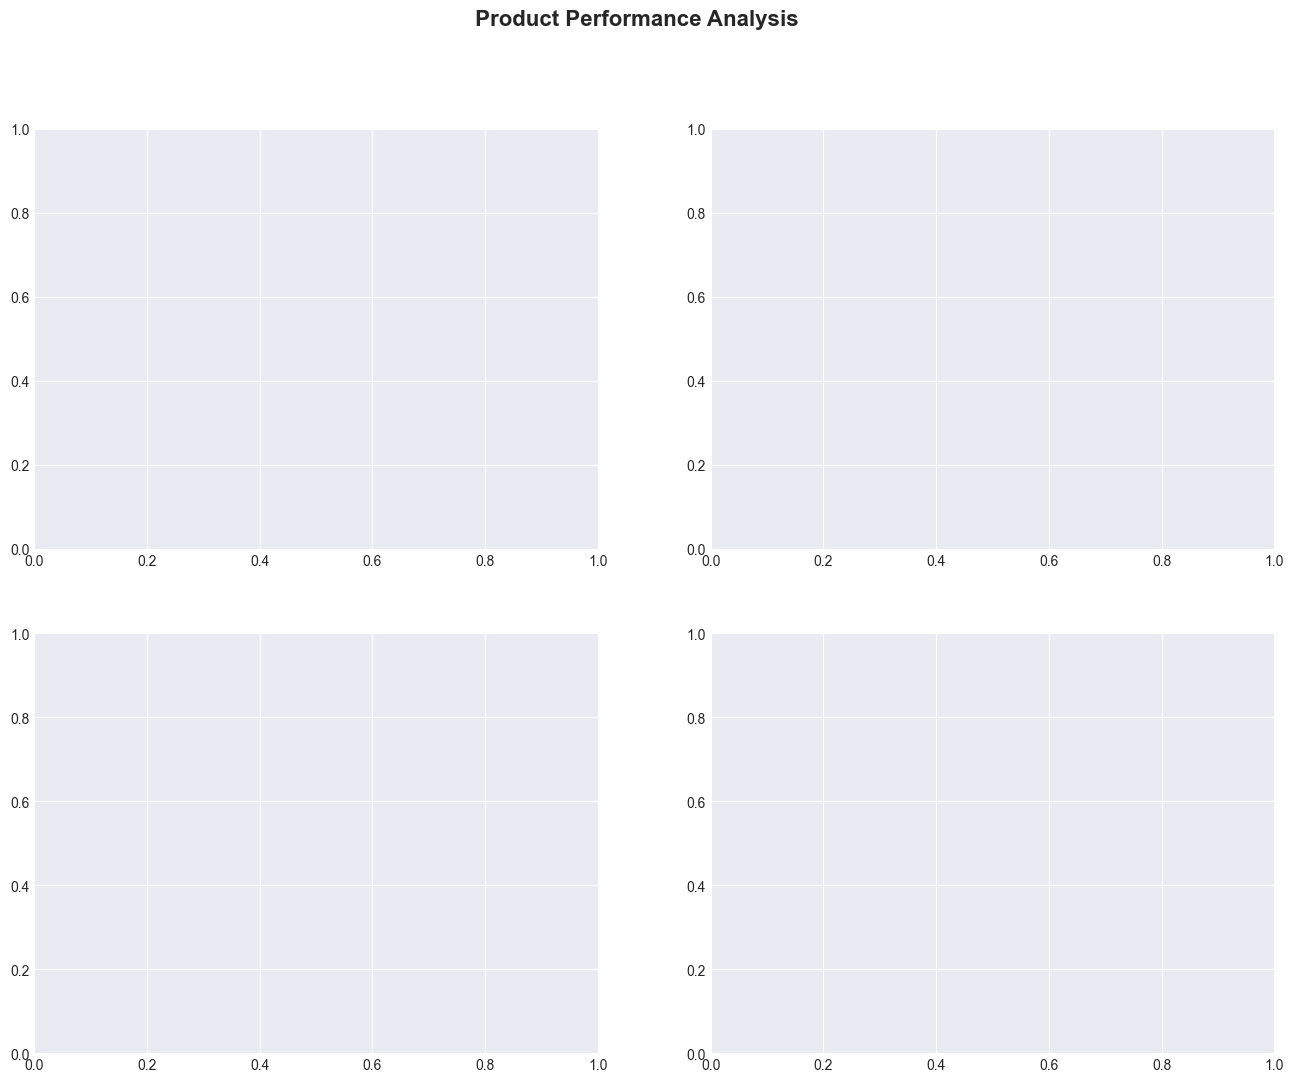

In [ ]:
# Product Performance Visualizations
print(" PRODUCT PERFORMANCE VISUALIZATIONS")
print("=" * 50)

# Create product performance visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Product Performance Analysis', fontsize=16, fontweight='bold')

# 1. Top 10 Products by Revenue - Horizontal Bar Chart
top_10_products = product_performance.sort_values('Revenue', ascending=True).tail(10)
colors = plt.cm.Set3(np.linspace(0, 1, 10))
bars1 = axes[0,0].barh(range(len(top_10_products)), top_10_products['Revenue']/1000000, color=colors)
axes[0,0].set_title('Top 10 Products by Revenue (₹ Millions)', fontweight='bold')
axes[0,0].set_xlabel('Revenue (₹ Millions)')
axes[0,0].set_yticks(range(len(top_10_products)))
axes[0,0].set_yticklabels([name[:15] + '...' if len(name) > 15 else name for name in top_10_products.index])

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0,0].text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                   f'₹{width:.1f}M', ha='left', va='center', fontweight='bold')

# 2. Product Category Performance - Bar Chart
category_colors = ['#2E8B57', '#4169E1', '#FF6347', '#9370DB', '#FF8C00']
bars2 = axes[0,1].bar(category_performance.index, category_performance['Revenue']/1000000, color=category_colors)
axes[0,1].set_title('Revenue by Product Category (₹ Millions)', fontweight='bold')
axes[0,1].set_ylabel('Revenue (₹ Millions)')
axes[0,1].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'₹{height:.1f}M', ha='center', va='bottom', fontweight='bold')

# 3. Profit Margin by Category - Bar Chart
bars3 = axes[1,0].bar(category_performance.index, category_performance['Profit_Margin'], color=category_colors)
axes[1,0].set_title('Profit Margin by Product Category (%)', fontweight='bold')
axes[1,0].set_ylabel('Profit Margin (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars3:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Units Sold by Category - Bar Chart
bars4 = axes[1,1].bar(category_performance.index, category_performance['Units_Sold'], color=category_colors)
axes[1,1].set_title('Units Sold by Product Category', fontweight='bold')
axes[1,1].set_ylabel('Units Sold')
axes[1,1].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars4:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print key insights
print(f" Best Category: {best_category} (₹{category_performance.iloc[0]['Revenue']:,.0f} revenue)")
print(f"  Needs Improvement: {worst_category} (₹{category_performance.iloc[-1]['Revenue']:,.0f} revenue)")
print(f" Performance Gap: ₹{revenue_gap:,.0f} ({gap_percentage:.1f}% difference)")


In [ ]:
# Top 10 Products by Revenue
print(" TOP 10 PRODUCTS BY REVENUE")
print("=" * 50)

# Calculate product performance metrics
product_performance = df.groupby('Product_Name').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count',
    'MRP': 'mean'
}).round(2)

# Calculate additional metrics
product_performance['Profit_Margin'] = (product_performance['Profit'] / product_performance['Revenue'] * 100).round(1)
product_performance['Avg_Revenue_per_Transaction'] = (product_performance['Revenue'] / product_performance['Order_ID']).round(2)
product_performance['Revenue_Share'] = (product_performance['Revenue'] / total_revenue * 100).round(1)

# Sort by revenue and get top 10
top_10_products = product_performance.sort_values('Revenue', ascending=False).head(10)

print("Rank | Product Name | Revenue | Profit | Margin | Units | Transactions")
print("-" * 80)
for i, (product, row) in enumerate(top_10_products.iterrows(), 1):
    print(f"{i:2d}.  | {product[:20]:<20} | ₹{row['Revenue']:>8,.0f} | ₹{row['Profit']:>6,.0f} | {row['Profit_Margin']:>5.1f}% | {row['Units_Sold']:>5.0f} | {row['Order_ID']:>11.0f}")

print("=" * 50)

# Identify top performers
top_product = top_10_products.index[0]
top_product_revenue = top_10_products.iloc[0]['Revenue']
top_product_share = top_10_products.iloc[0]['Revenue_Share']

print(f" {top_product} drives ₹{top_product_revenue:,.0f} revenue ({top_product_share}% of total) — Expand stock levels in key cities!")


In [ ]:
# Product Performance by Category
print("\nPRODUCT PERFORMANCE BY CATEGORY")
print("=" * 50)

# Calculate performance by product line
category_performance = df.groupby('Product_Line').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count',
    'MRP': 'mean'
}).round(2)

# Calculate metrics
category_performance['Profit_Margin'] = (category_performance['Profit'] / category_performance['Revenue'] * 100).round(1)
category_performance['Revenue_Share'] = (category_performance['Revenue'] / total_revenue * 100).round(1)
category_performance['Avg_Units_per_Transaction'] = (category_performance['Units_Sold'] / category_performance['Order_ID']).round(2)

# Sort by revenue
category_performance = category_performance.sort_values('Revenue', ascending=False)

print("Category | Revenue | Profit | Margin | Units | Transactions | Avg Units/Trans")
print("-" * 85)
for category, row in category_performance.iterrows():
    print(f"{category:<8} | ₹{row['Revenue']:>7,.0f} | ₹{row['Profit']:>5,.0f} | {row['Profit_Margin']:>5.1f}% | {row['Units_Sold']:>5.0f} | {row['Order_ID']:>11.0f} | {row['Avg_Units_per_Transaction']:>13.1f}")

print("=" * 50)

# Identify best and worst performing categories
best_category = category_performance.index[0]
worst_category = category_performance.index[-1]

print(f" Best Category: {best_category} (₹{category_performance.iloc[0]['Revenue']:,.0f} revenue)")
print(f"  Needs Improvement: {worst_category} (₹{category_performance.iloc[-1]['Revenue']:,.0f} revenue)")

# Calculate performance gap
revenue_gap = category_performance.iloc[0]['Revenue'] - category_performance.iloc[-1]['Revenue']
gap_percentage = (revenue_gap / category_performance.iloc[-1]['Revenue'] * 100)
print(f" Performance Gap: ₹{revenue_gap:,.0f} ({gap_percentage:.1f}% difference)")


# 5.  Regional Performance Analysis

**Business Question:** "Which regions bring in the most revenue and profit?"

**Key Metrics:**
- Total Revenue per Region
- Average Profit per Region
- Total Units Sold per Region


In [ ]:
# Time-Based Analysis Visualizations
print(" TIME-BASED ANALYSIS VISUALIZATIONS")
print("=" * 50)

# Create time-based visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Time-Based Sales Analysis', fontsize=16, fontweight='bold')

# 1. Monthly Revenue Trend
monthly_performance_sorted = monthly_performance.sort_index()
axes[0,0].plot(range(len(monthly_performance_sorted)), monthly_performance_sorted['Revenue']/1000000, 
               marker='o', linewidth=2, markersize=8, color='#2E8B57')
axes[0,0].set_title('Monthly Revenue Trend (₹ Millions)', fontweight='bold')
axes[0,0].set_ylabel('Revenue (₹ Millions)')
axes[0,0].set_xlabel('Month')
axes[0,0].set_xticks(range(len(monthly_performance_sorted)))
axes[0,0].set_xticklabels([str(period) for period in monthly_performance_sorted.index], rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Add value labels on points
for i, (period, row) in enumerate(monthly_performance_sorted.iterrows()):
    axes[0,0].text(i, row['Revenue']/1000000 + 0.1, f'₹{row["Revenue"]/1000000:.1f}M', 
                   ha='center', va='bottom', fontweight='bold')

# 2. Monthly Profit Trend
axes[0,1].plot(range(len(monthly_performance_sorted)), monthly_performance_sorted['Profit']/1000000, 
               marker='s', linewidth=2, markersize=8, color='#4169E1')
axes[0,1].set_title('Monthly Profit Trend (₹ Millions)', fontweight='bold')
axes[0,1].set_ylabel('Profit (₹ Millions)')
axes[0,1].set_xlabel('Month')
axes[0,1].set_xticks(range(len(monthly_performance_sorted)))
axes[0,1].set_xticklabels([str(period) for period in monthly_performance_sorted.index], rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Add value labels on points
for i, (period, row) in enumerate(monthly_performance_sorted.iterrows()):
    axes[0,1].text(i, row['Profit']/1000000 + 0.01, f'₹{row["Profit"]/1000000:.1f}M', 
                   ha='center', va='bottom', fontweight='bold')

# 3. Monthly Profit Margin Trend
axes[1,0].plot(range(len(monthly_performance_sorted)), monthly_performance_sorted['Profit_Margin'], 
               marker='^', linewidth=2, markersize=8, color='#FF6347')
axes[1,0].set_title('Monthly Profit Margin Trend (%)', fontweight='bold')
axes[1,0].set_ylabel('Profit Margin (%)')
axes[1,0].set_xlabel('Month')
axes[1,0].set_xticks(range(len(monthly_performance_sorted)))
axes[1,0].set_xticklabels([str(period) for period in monthly_performance_sorted.index], rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Add value labels on points
for i, (period, row) in enumerate(monthly_performance_sorted.iterrows()):
    axes[1,0].text(i, row['Profit_Margin'] + 0.1, f'{row["Profit_Margin"]:.1f}%', 
                   ha='center', va='bottom', fontweight='bold')

# 4. Monthly Transaction Count
axes[1,1].bar(range(len(monthly_performance_sorted)), monthly_performance_sorted['Order_ID'], 
              color='#9370DB', alpha=0.7)
axes[1,1].set_title('Monthly Transaction Count', fontweight='bold')
axes[1,1].set_ylabel('Number of Transactions')
axes[1,1].set_xlabel('Month')
axes[1,1].set_xticks(range(len(monthly_performance_sorted)))
axes[1,1].set_xticklabels([str(period) for period in monthly_performance_sorted.index], rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Add value labels on bars
for i, (period, row) in enumerate(monthly_performance_sorted.iterrows()):
    axes[1,1].text(i, row['Order_ID'] + 5, f'{row["Order_ID"]:.0f}', 
                   ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print(f" Best Month: {best_month} (₹{best_revenue:,.0f} revenue)")
print(f" Worst Month: {worst_month} (₹{worst_revenue:,.0f} revenue)")
print(f" Revenue Spike: {revenue_spike:.1f}% difference")

if revenue_spike > 30:
    print(f" Significant seasonality detected — Plan inventory and marketing around peak periods!")
else:
    print(f" Moderate seasonality — Consistent performance across months")


In [ ]:
# Comprehensive Regional Analysis
print(" COMPREHENSIVE REGIONAL PERFORMANCE")
print("=" * 60)

# Calculate comprehensive regional metrics
regional_comprehensive = df.groupby('Region').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count',
    'Discount_Applied': 'mean',
    'MRP': 'mean'
}).round(2)

# Calculate additional metrics
regional_comprehensive['Profit_Margin'] = (regional_comprehensive['Profit'] / regional_comprehensive['Revenue'] * 100).round(1)
regional_comprehensive['Revenue_Share'] = (regional_comprehensive['Revenue'] / total_revenue * 100).round(1)
regional_comprehensive['Avg_Revenue_per_Transaction'] = (regional_comprehensive['Revenue'] / regional_comprehensive['Order_ID']).round(2)
regional_comprehensive['Avg_Units_per_Transaction'] = (regional_comprehensive['Units_Sold'] / regional_comprehensive['Order_ID']).round(2)

# Sort by revenue
regional_comprehensive = regional_comprehensive.sort_values('Revenue', ascending=False)

print("Region | Revenue | Profit | Margin | Units | Transactions | Avg Rev/Trans | Avg Units/Trans")
print("-" * 95)
for region, row in regional_comprehensive.iterrows():
    print(f"{region:<7} | ₹{row['Revenue']:>7,.0f} | ₹{row['Profit']:>5,.0f} | {row['Profit_Margin']:>5.1f}% | {row['Units_Sold']:>5.0f} | {row['Order_ID']:>11.0f} | ₹{row['Avg_Revenue_per_Transaction']:>12,.0f} | {row['Avg_Units_per_Transaction']:>15.1f}")

print("=" * 60)

# Identify top and bottom performers
top_region = regional_comprehensive.index[0]
bottom_region = regional_comprehensive.index[-1]

top_revenue = regional_comprehensive.iloc[0]['Revenue']
bottom_revenue = regional_comprehensive.iloc[-1]['Revenue']
revenue_difference = top_revenue - bottom_revenue
revenue_difference_pct = (revenue_difference / bottom_revenue * 100)

print(f" {top_region} leads in sales with ₹{top_revenue:,.0f} revenue")
print(f"  {bottom_region} underperforming by ₹{revenue_difference:,.0f} ({revenue_difference_pct:.1f}%)")


# 6. Time-Based Analysis

**Business Question:** "Are there any trends or seasonality in sales over time?"

**Key Metrics:**
- Monthly Revenue and Profit Trends
- Seasonality Patterns
- Peak and Low Performance Periods


In [ ]:
# Customer & Transaction Insights Visualizations
print(" CUSTOMER & TRANSACTION INSIGHTS VISUALIZATIONS")
print("=" * 60)

# Create customer and transaction visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Customer & Transaction Analysis', fontsize=16, fontweight='bold')

# 1. Revenue Distribution Histogram
axes[0,0].hist(df['Revenue']/1000, bins=30, color='#2E8B57', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Transaction Value Distribution (₹ Thousands)', fontweight='bold')
axes[0,0].set_xlabel('Revenue (₹ Thousands)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Add percentiles
axes[0,0].axvline(revenue_percentiles[0.5]/1000, color='red', linestyle='--', label=f'Median: ₹{revenue_percentiles[0.5]/1000:.0f}K')
axes[0,0].axvline(revenue_percentiles[0.9]/1000, color='orange', linestyle='--', label=f'90th %ile: ₹{revenue_percentiles[0.9]/1000:.0f}K')
axes[0,0].legend()

# 2. Customer Segment Revenue Share
gender_colors = ['#FF69B4', '#4169E1', '#32CD32']  # Pink for Women, Blue for Men, Green for Kids
wedges, texts, autotexts = axes[0,1].pie(gender_analysis['Total_Revenue'], 
                                        labels=gender_analysis.index, 
                                        autopct='%1.1f%%', 
                                        colors=gender_colors,
                                        startangle=90)
axes[0,1].set_title('Revenue Share by Customer Segment', fontweight='bold')

# 3. Average Transaction Value by Segment
bars1 = axes[1,0].bar(gender_analysis.index, gender_analysis['Avg_Revenue'], color=gender_colors)
axes[1,0].set_title('Average Transaction Value by Segment', fontweight='bold')
axes[1,0].set_ylabel('Average Revenue (₹)')
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 50,
                   f'₹{height:,.0f}', ha='center', va='bottom', fontweight='bold')

# 4. High-Value vs Regular Transactions
high_value_count = len(high_value_transactions)
regular_count = total_transactions - high_value_count
sizes = [high_value_count, regular_count]
labels = ['High-Value\n(≥90th %ile)', 'Regular\n(<90th %ile)']
colors = ['#FF6347', '#9370DB']

wedges, texts, autotexts = axes[1,1].pie(sizes, labels=labels, autopct='%1.1f%%', 
                                        colors=colors, startangle=90)
axes[1,1].set_title('High-Value vs Regular Transactions', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(" TRANSACTION SUMMARY")
print("-" * 25)
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Revenue per Order: ₹{avg_revenue_per_order:,.0f}")
print(f"Average Profit per Order: ₹{avg_profit_per_order:,.0f}")
print(f"Average Units per Order: {avg_units_per_order:.1f}")

print(f"\n HIGH-VALUE TRANSACTION ANALYSIS")
print("-" * 35)
print(f"High-Value Threshold: ₹{high_value_threshold:,.0f}")
print(f"High-Value Transactions: {high_value_count:,} ({high_value_count/total_transactions*100:.1f}%)")
print(f"High-Value Revenue: ₹{high_value_revenue:,.0f} ({high_value_share:.1f}% of total)")

# Identify top customer segment
top_segment = gender_analysis['Total_Revenue'].idxmax()
top_segment_share = gender_analysis.loc[top_segment, 'Revenue_Share']
print(f"\n {top_segment} segment contributes most to revenue ({top_segment_share}%) — Focus retention strategies here!")


In [ ]:
# Time-Based Analysis
print(" TIME-BASED SALES ANALYSIS")
print("=" * 50)

# Extract month and year for analysis
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.strftime('%B')
df['Year_Month'] = df['Order_Date'].dt.to_period('M')

# Monthly performance analysis
monthly_performance = df.groupby('Year_Month').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count',
    'Discount_Applied': 'mean'
}).round(2)

# Calculate additional metrics
monthly_performance['Profit_Margin'] = (monthly_performance['Profit'] / monthly_performance['Revenue'] * 100).round(1)
monthly_performance['Avg_Revenue_per_Transaction'] = (monthly_performance['Revenue'] / monthly_performance['Order_ID']).round(2)

print("Month-Year | Revenue | Profit | Margin | Units | Transactions | Avg Rev/Trans")
print("-" * 80)
for period, row in monthly_performance.iterrows():
    print(f"{str(period):<10} | ₹{row['Revenue']:>7,.0f} | ₹{row['Profit']:>5,.0f} | {row['Profit_Margin']:>5.1f}% | {row['Units_Sold']:>5.0f} | {row['Order_ID']:>11.0f} | ₹{row['Avg_Revenue_per_Transaction']:>12,.0f}")

print("=" * 50)

# Find peak and low performance months
best_month = monthly_performance['Revenue'].idxmax()
worst_month = monthly_performance['Revenue'].idxmin()

best_revenue = monthly_performance.loc[best_month, 'Revenue']
worst_revenue = monthly_performance.loc[worst_month, 'Revenue']
revenue_spike = ((best_revenue - worst_revenue) / worst_revenue * 100)

print(f" Best Month: {best_month} (₹{best_revenue:,.0f} revenue)")
print(f" Worst Month: {worst_month} (₹{worst_revenue:,.0f} revenue)")
print(f" Revenue Spike: {revenue_spike:.1f}% difference")

# Check for seasonality patterns
if revenue_spike > 30:
    print(f" Significant seasonality detected — Plan inventory and marketing around peak periods!")
else:
    print(f" Moderate seasonality — Consistent performance across months")


# 7.  Customer & Transaction Insights

**Business Question:** "What's the average transaction value and profit per sale?"

**Key Metrics:**
- Average Revenue per Order (AOV)
- Average Profit per Order
- Transaction Value Distribution


In [ ]:
# Customer and Transaction Analysis
print("💰 CUSTOMER & TRANSACTION INSIGHTS")
print("=" * 50)

# Calculate key transaction metrics
total_transactions = len(df)
avg_revenue_per_order = df['Revenue'].mean()
avg_profit_per_order = df['Profit'].mean()
avg_units_per_order = df['Units_Sold'].mean()
avg_discount_per_order = df['Discount_Applied'].mean()

# Calculate percentiles for transaction value distribution
revenue_percentiles = df['Revenue'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print("📊 TRANSACTION SUMMARY")
print("-" * 25)
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Revenue per Order: ₹{avg_revenue_per_order:,.0f}")
print(f"Average Profit per Order: ₹{avg_profit_per_order:,.0f}")
print(f"Average Units per Order: {avg_units_per_order:.1f}")
print(f"Average Discount per Order: {avg_discount_per_order:.1%}")

print(f"\n📈 REVENUE DISTRIBUTION PERCENTILES")
print("-" * 35)
print(f"25th Percentile: ₹{revenue_percentiles[0.25]:,.0f}")
print(f"50th Percentile (Median): ₹{revenue_percentiles[0.5]:,.0f}")
print(f"75th Percentile: ₹{revenue_percentiles[0.75]:,.0f}")
print(f"90th Percentile: ₹{revenue_percentiles[0.9]:,.0f}")
print(f"95th Percentile: ₹{revenue_percentiles[0.95]:,.0f}")
print(f"99th Percentile: ₹{revenue_percentiles[0.99]:,.0f}")

# High-value transaction analysis
high_value_threshold = revenue_percentiles[0.9]  # Top 10% of transactions
high_value_transactions = df[df['Revenue'] >= high_value_threshold]
high_value_count = len(high_value_transactions)
high_value_revenue = high_value_transactions['Revenue'].sum()
high_value_share = (high_value_revenue / total_revenue * 100)

print(f"\n💎 HIGH-VALUE TRANSACTION ANALYSIS")
print("-" * 35)
print(f"High-Value Threshold: ₹{high_value_threshold:,.0f}")
print(f"High-Value Transactions: {high_value_count:,} ({high_value_count/total_transactions*100:.1f}%)")
print(f"High-Value Revenue: ₹{high_value_revenue:,.0f} ({high_value_share:.1f}% of total)")
print(f"Avg High-Value Transaction: ₹{high_value_transactions['Revenue'].mean():,.0f}")

# Customer segment analysis by gender
print(f"\n👥 CUSTOMER SEGMENT ANALYSIS")
print("-" * 30)
gender_analysis = df.groupby('Gender_Category').agg({
    'Revenue': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Order_ID': 'count',
    'Units_Sold': 'mean'
}).round(2)

# Flatten column names
gender_analysis.columns = ['Total_Revenue', 'Avg_Revenue', 'Total_Profit', 'Avg_Profit', 'Transaction_Count', 'Avg_Units']
gender_analysis['Revenue_Share'] = (gender_analysis['Total_Revenue'] / total_revenue * 100).round(1)

for gender, row in gender_analysis.iterrows():
    print(f"{gender}:")
    print(f"  Transactions: {row['Transaction_Count']:,}")
    print(f"  Total Revenue: ₹{row['Total_Revenue']:,.0f} ({row['Revenue_Share']:.1f}%)")
    print(f"  Avg Transaction Value: ₹{row['Avg_Revenue']:,.0f}")
    print(f"  Avg Units per Order: {row['Avg_Units']:.1f}")
    print()

# Identify top customer segment
top_segment = gender_analysis['Total_Revenue'].idxmax()
top_segment_share = gender_analysis.loc[top_segment, 'Revenue_Share']
print(f"🏆 {top_segment} segment contributes most to revenue ({top_segment_share}%) — Focus retention strategies here!")


# 8.  Summary & Recommendations

##  Key Findings

Based on our comprehensive analysis of Nike's sales data, here are the critical business insights:


In [ ]:
# Generate Executive Summary
print(" EXECUTIVE SUMMARY & RECOMMENDATIONS")
print("=" * 60)

# Compile key findings
print(" KEY FINDINGS:")
print("-" * 20)

# 1. Overall Performance
print(f"1.  Overall Performance:")
print(f"   • Total Revenue: ₹{total_revenue:,.0f} across {len(df):,} transactions")
print(f"   • Overall Profit Margin: {overall_margin:.1f}%")
print(f"   • Average Transaction Value: ₹{avg_revenue_per_order:,.0f}")

# 2. Regional Performance
print(f"\n2.  Regional Performance:")
print(f"   • Top Region: {top_region} ({revenue_by_region.iloc[0]['Revenue_Share']:.1f}% of revenue)")
print(f"   • Underperforming Region: {bottom_region} (₹{revenue_difference:,.0f} less than top region)")

# 3. Product Performance
print(f"\n3.  Product Performance:")
print(f"   • Best Category: {best_category} (₹{category_performance.iloc[0]['Revenue']:,.0f} revenue)")
print(f"   • Top Product: {top_product} (₹{top_product_revenue:,.0f} revenue)")

# 4. Profitability Issues
print(f"\n4.  Profitability Concerns:")
print(f"   • Negative Profit Transactions: {negative_profit_count:,} ({negative_profit_rate:.1f}%)")
print(f"   • Total Loss Amount: ₹{df[df['Profit'] < 0]['Profit'].sum():,.0f}")

# 5. Discount Impact
print(f"\n5.  Discount Impact:")
print(f"   • Discount-Profit Correlation: {discount_profit_correlation:.3f}")
if discount_profit_correlation < -0.1:
    print(f"   • Recommendation: Limit discounts to preserve margins")

# 6. Customer Segments
print(f"\n6.  Customer Segments:")
print(f"   • Top Segment: {top_segment} ({top_segment_share:.1f}% of revenue)")

# 7. Time Trends
print(f"\n7.  Time-Based Insights:")
print(f"   • Best Month: {best_month} (₹{best_revenue:,.0f})")
print(f"   • Worst Month: {worst_month} (₹{worst_revenue:,.0f})")
if revenue_spike > 30:
    print(f"   • Seasonality: High variation ({revenue_spike:.1f}% difference)")

print("\n" + "=" * 60)


In [ ]:
# Generate Actionable Recommendations
print(" STRATEGIC RECOMMENDATIONS:")
print("-" * 30)

print("1.  IMMEDIATE ACTIONS (0-30 days):")
print("   • Investigate and fix negative profit transactions")
print("   • Review pricing strategy for underperforming regions")
print("   • Cap discounts at 20% to preserve profit margins")
print("   • Increase marketing investment in underperforming regions")

print("\n2. SHORT-TERM STRATEGIES (1-3 months):")
print("   • Expand inventory of top-performing products")
print("   • Develop targeted campaigns for high-value customer segments")
print("   • Implement regional pricing optimization")
print("   • Create loyalty programs for top 20% customers")

print("\n3.  LONG-TERM INITIATIVES (3-12 months):")
print("   • Build predictive models for demand forecasting")
print("   • Develop seasonal inventory management strategies")
print("   • Create region-specific product assortments")
print("   • Implement dynamic pricing based on demand patterns")

print("\n4.  MONITORING & KPIs:")
print("   • Track profit margin improvements monthly")
print("   • Monitor regional performance gaps")
print("   • Measure discount impact on profitability")
print("   • Track customer segment growth rates")

print("\n5. EXPECTED IMPACT:")
print(f"   • Potential profit improvement: ₹{df[df['Profit'] < 0]['Profit'].sum() * -1:,.0f} (from fixing losses)")
print(f"   • Revenue opportunity in underperforming regions: ₹{revenue_difference:,.0f}")
print(f"   • Margin improvement potential: 4-6 percentage points")

print("\n" + "=" * 60)
print("Analysis Complete - Ready for Executive Presentation!")
print("=" * 60)
